### Case Condition (Brief)

### Задание 1:  
***Имеется набор данных со следующими столбцами:***  
    1) Идентификатор документа  
    2) Идентификатор товара  
    3) Операция документа  
    4) Дата документа  
    5) Идентификатор филиала, создавшего документ  
    
> *Идентификатор товара – уникальный номер единицы товара, находящейся в сервисном центре*

Этот набор данных связан со справочником филиалов. Справочник содержит следующие поля:  
    1) Идентификатор филиала  
    2) Наименование филиала  
    3) Наименование региона филиала  
    
***Необходимо рассчитать среднее время нахождения товара в сервисном центре:   
    1) Общая динамика по месяцам   
    2) Динамика по неделям в разрезе регионов  
Вывести нормативный срок по всей компании.  
Графически представить динамику отклонения от нормы по каждому региону.***

### Задание 2:  
Вы работаете сотрудником, осуществляющим прием клиентов в сервисном центре.  
К вам пришел клиент.  
Какие варианты развития событий могут последовать далее?  
Опишите их.  

### Import libraries and Reading the data.

In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
# Получение пути к файлам
catalog_path = "./data/Справочник.csv"
data_path = "./data/data.csv"

In [3]:
# Создание DF
catalog = pd.read_csv(catalog_path)
data = pd.read_csv(data_path)

### Review Data (Understanding the Data)

In [4]:
print(catalog.isnull().sum())
print(50 * "-")
print(data.isnull().sum())

Наименование филиала            0
Наименование региона филиала    0
Идентификатор филиала           0
dtype: int64
--------------------------------------------------
Идентификатор документа            0
Идентификатор товара               0
Вид операции документа             0
Дата документа                     0
Идентификатор филиалы документа    0
dtype: int64


### Splitting data.
>Разделяю данные по признаку (Вид операции документа) на два новых Датасета.

In [5]:
# Получение фрейма по признаку (Вид операции документа == Прием товара) 
df_acceptance_of_goods = pd.concat([
    data['Идентификатор товара'],
    data['Дата документа'].loc[data['Вид операции документа'] == 'Прием товара'], 
    data['Вид операции документа'].loc[data['Вид операции документа'] == 'Прием товара'],
], axis=1)
df_acceptance_of_goods = df_acceptance_of_goods.dropna()

df_acceptance_of_goods

,Идентификатор товара,Дата документа,Вид операции документа
0,b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,2019-01-01,Прием товара
1,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',2019-01-01,Прием товара
2,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,2019-01-01,Прием товара
3,b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,2019-01-01,Прием товара
4,b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,2019-01-01,Прием товара
...,...,...,...
2912480,b'\xa5p\xcb\xf8\xed\xbc\x94<\x17w\x98}\x18UQ\x84',2019-12-31,Прием товара
2912481,"b'>\xeey\xe9%o\xd4Y/\xef""S\x01\xfal\xd3'",2019-12-31,Прием товара
2912483,"b""4\xbe\xdf\xdc\n\xf4b\x9ay\xb1\x8c'\xd5\xa8\x...",2019-12-31,Прием товара
2912485,b'\x89\x8df\x02\x8d\xc2(\xc9\x17M4\xb9\xe9\x9a...,2019-12-31,Прием товара


In [6]:
# Получение фрейма по признаку (Вид операции документа == Выдача товара) 
df_exit_of_goods_from_service_1 = pd.concat([    
    data['Идентификатор товара'], 
    data['Дата документа'].loc[data['Вид операции документа'] == 'Выдача товара'], 
    data['Вид операции документа'].loc[data['Вид операции документа'] == 'Выдача товара'],
], axis=1)
df_exit_of_goods_from_service_1 = df_exit_of_goods_from_service_1.dropna()

df_exit_of_goods_from_service_1

,Идентификатор товара,Дата документа,Вид операции документа
8217,b'\x87\x1e\xc6\xf3C\xdb\x0c\xc3\x8a\\`\xa1\xd4...,2019-01-02,Выдача товара
8218,b'\xad@\xa8\x97\xdf\x80\x08\xd1Pz\xe2\xc6H/C\x83',2019-01-02,Выдача товара
8219,b'n8\x95\xf6(D\xe8\x82F\x07\xba\xb2\xa1\x90\x0...,2019-01-02,Выдача товара
8220,b'\x16i\x91\x86\x93/d\xd4\xe8\xc05B\x9b\x0e\x1...,2019-01-02,Выдача товара
8221,b'\xa0\xaf\xccR[J\x1ea\xfcj\x03+\xe5VSx',2019-01-02,Выдача товара
...,...,...,...
2916592,b'`^\x94\t\xe6=\xc8)Uy8B\xcbH\x92n',2020-01-01,Выдача товара
2916593,"b'\xee\xec\x1fwz#$\xf4,1\x7fx_O0r'",2020-01-01,Выдача товара
2916594,b'\x0c|Y\xdc\xea~\x1f\xb5\x02T\xc6%\xc9\x00G\xca',2020-01-01,Выдача товара
2916595,b'?\xc3\x96y{\xb4\xebe\xf9\x89\xf5u\x11\x92\x8...,2020-01-01,Выдача товара


In [7]:
# Левое соединение двух фреймов по колонне "Идентификатор товара".
df_list_of_received_and_issued = df_acceptance_of_goods.merge(df_exit_of_goods_from_service_1, left_on='Идентификатор товара', right_on='Идентификатор товара')
df_list_of_received_and_issued

,Идентификатор товара,Дата документа_x,Вид операции документа_x,Дата документа_y,Вид операции документа_y
0,b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,2019-01-01,Прием товара,2019-01-20,Выдача товара
1,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',2019-01-01,Прием товара,2019-01-18,Выдача товара
2,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,2019-01-01,Прием товара,2019-02-04,Выдача товара
3,b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,2019-01-01,Прием товара,2019-01-27,Выдача товара
4,b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,2019-01-01,Прием товара,2019-01-09,Выдача товара
...,...,...,...,...,...
1416807,b'\x80WF\xac\xda8\xa7\xa6\xe1\xb4\xa7\x84\xae8...,2019-12-31,Прием товара,2020-01-01,Выдача товара
1416808,b'\xbb\xa8\xea\xa9<\xe3\xe7\xe9W\x87\x18\x81:\...,2019-12-31,Прием товара,2020-01-01,Выдача товара
1416809,b'\x01\xfb\xd2f%Yr\x85e:\x18M\xbf\xa0\xacj',2019-12-31,Прием товара,2020-01-01,Выдача товара
1416810,"b'B\xa2\x90\x199?,\xdd8GG\x9a\x97v\xc6X'",2019-12-31,Прием товара,2020-01-01,Выдача товара


#### Общая динамика по месяцам

In [8]:
# Преобразование "str" в "datetime64".
# Необходимо для вычитания дат.
df_list_of_received_and_issued["Дата документа_x"] = pd.to_datetime(df_list_of_received_and_issued["Дата документа_x"])
df_list_of_received_and_issued["Дата документа_y"] = pd.to_datetime(df_list_of_received_and_issued["Дата документа_y"])

In [9]:
# "Месяц" в отдельную колонку.
df_list_of_received_and_issued['Месяц'] = df_list_of_received_and_issued['Дата документа_x'].dt.month

# Добавление новой колонки со сроками нахождения в СЦ.
df_list_of_received_and_issued['Срок(дней)'] = (df_list_of_received_and_issued['Дата документа_y'] - df_list_of_received_and_issued['Дата документа_x']).dt.days


##### January
> Подготовка алгоритма для нахождения среднего времени(в днях) товара в сервисном центре (Общая динамика по месяцам).

In [31]:
# Получаю данные за 01(Январь) Месяц.
df_january = df_list_of_received_and_issued.loc[df_list_of_received_and_issued['Месяц']==1]
# df_january

In [32]:
# Определяю соотношение заявок в СЦ и длительности сроков их исполнения.
df_mean = pd.DataFrame(df_january['Срок(дней)'].value_counts().sort_index())
df_mean = df_mean.reset_index()
df_mean.rename(columns={'index': 'Дней в СЦ', 'Срок(дней)': 'Колличество заявлений'},inplace=True)

# df_mean.head()

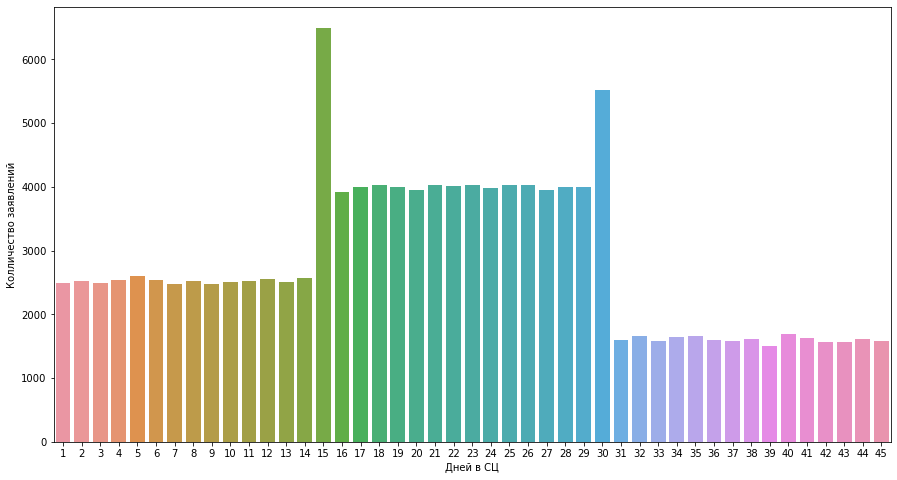

In [33]:
# Вывод результата на график.
plt.figure(figsize=(15,8))
ax = sns.barplot(x=df_mean['Дней в СЦ'], y=df_mean['Колличество заявлений'], data=df_mean)
plt.xlabel('Дней в СЦ')
plt.ylabel('Колличество заявлений');